# **Ajuste para el sistema simple $Fe_{x}Al_{1-x}$**

---


## *Metodo con de interpolacion polinomica implicita*

el número de terminos de la energía sera:
2
el número de terminos de la energía sera:
3


<ipython-input-26-aea7e2dc26cb>:52: RuntimeWarning: divide by zero encountered in true_divide
  return (7/8)*(1+(1-x)*(1-x)*np.tanh((v)/y))
<ipython-input-26-aea7e2dc26cb>:55: UserWarning: The following kwargs were not used by contour: 'label'
  teo=plt.contour(x, y, poli(x,y), [1], colors= color[c-1] , label='P'+str(c+1)+'(x)' )


el número de terminos de la energía sera:
4
el número de terminos de la energía sera:
5
el número de terminos de la energía sera:
6
el número de terminos de la energía sera:
7
el número de terminos de la energía sera:
8


/usr/local/lib/python3.8/dist-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


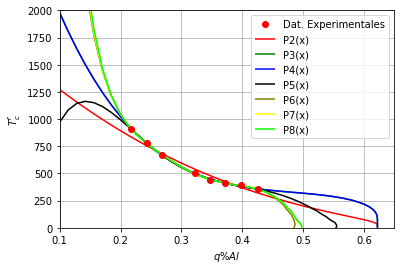

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit




color=['red','green','blue','black','olive','yellow','lime','navy']


for c in range(1,8):

  print( "el número de terminos de la energía sera:")
  b=np.zeros((1,c+1))
  D=np.array([[0.21715817694369968,6.1148036253776431], [0.242895442359249,5.244712990936557], [0.268632707774799, 4.47129909365559], [0.32171581769436997, 3.375629405840887],[0.3474530831099195, 2.972809667673718],[0.3715817694369973,2.7472306143001024],[0.39731903485254694,2.618328298086608],[0.42627345844504017,2.376636455186306]])

  #Que es esto?
  for i in range(0,8):
    D[i,1]=148.8*D[i,1]

  dime=np.size(b,1)
  print(dime)


  #Funcion a ajustar
  def make_func(numarg):
      def func(X, *k):
        x, y = X.T
        ng=numarg
        v=0
        for i in range(0,ng):
          v+=k[i]*(1-x)**i
        return (7/8)*(1+(1-x)*(1-x)*np.tanh((v)/y))
      return func


  # ejes de los datos
  xrange = np.linspace(0.1, 0.65, 40)
  yrange = np.linspace(0, 2000, 11000)
  x, y = np.meshgrid(xrange, yrange)


  #haciendo el curve fitting
  popt, pcov = curve_fit(make_func(dime), D,1, p0=b)

 #Definiendo el polinomio
  def poli(x,y):
      v=0
      for i in range(len(popt)):
          v+=popt[i]*(1-x)**i
      return (7/8)*(1+(1-x)*(1-x)*np.tanh((v)/y))


  teo=plt.contour(x, y, poli(x,y), [1], colors= color[c-1]  )



  teo.collections[0].set_label('P'+str(c+1)+'(x)')

  plt.xlabel('$q\%Al$')
  plt.ylabel('$T^{r}_{c}$');


plt.grid()
exp=plt.plot(D[:,0],D[:,1],"ro", label='Dat. Experimentales')
plt.legend()
plt.show()






## Interpolación implicita modificando el polinomio

Nota: Se obtiene el mismo resultado que en el caso anterior

el número de terminos de la energía sera:
2
el número de terminos de la energía sera:
3
el número de terminos de la energía sera:
4


<ipython-input-128-971b951e8ca5>:50: RuntimeWarning: divide by zero encountered in true_divide
  return (7/8)*(1+(1-x)*(1-x)*np.tanh((v)/y))


el número de terminos de la energía sera:
5
el número de terminos de la energía sera:
6
el número de terminos de la energía sera:
7
el número de terminos de la energía sera:
8


/usr/local/lib/python3.8/dist-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


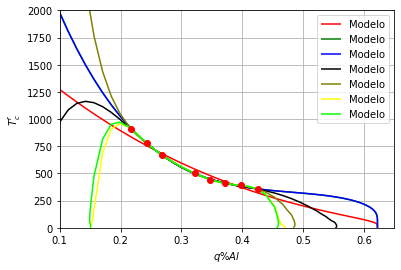

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


color=['red','green','blue','black','olive','yellow','lime','navy']


for c in range(1,8):

  print( "el número de terminos de la energía sera:")
  b=np.zeros((1,c+1))
  D=np.array([[0.21715817694369968,6.1148036253776431], [0.242895442359249,5.244712990936557], [0.268632707774799, 4.47129909365559], [0.32171581769436997, 3.375629405840887],[0.3474530831099195, 2.972809667673718],[0.3715817694369973,2.7472306143001024],[0.39731903485254694,2.618328298086608],[0.42627345844504017,2.376636455186306]])

  #Que es esto?
  for i in range(0,8):
    D[i,1]=148.8*D[i,1]

  dime=np.size(b,1)
  print(dime)


  #Funcion a ajustar
  def make_func(numarg):
      def func(X, *k):
        x, y = X.T
        ng=numarg
        v=0
        for i in range(0,ng):
          v+=k[i]*(x)**i #MODIFICANDO EL POLINOMIO
        return (7/8)*(1+(1-x)*(1-x)*np.tanh((v)/y))
      return func


  # ejes de los datos
  xrange = np.linspace(0.1, 0.65, 40)
  yrange = np.linspace(0, 2000, 11000)
  x, y = np.meshgrid(xrange, yrange)


  #haciendo el curve fitting
  popt, pcov = curve_fit(make_func(dime), D,1, p0=b)

 #Definiendo el polinomio
  def poli(x,y):
      v=0
      for i in range(len(popt)):
          v+=popt[i]*(x)**i #MODIFICANDO EL POLINOMIO
      return (7/8)*(1+(1-x)*(1-x)*np.tanh((v)/y))


  teo=plt.contour(x, y, poli(x,y), [1], colors= color[c-1] )
  labels = ['Modelo']
  teo.collections[0].set_label(labels[0])
  plt.legend(loc='upper right')
  plt.xlabel('$q\%Al$')
  plt.ylabel('$T^{r}_{c}$');



plt.grid()
exp=plt.plot(D[:,0],D[:,1],"ro", label='Dat. Experimentales')
plt.show()




## *Metodo con  interpolacion polinomica explicita*

Aqui se usa polifit, metodo de optimizacion por minimos cuadrados para hallar el polinomio optimo, Ver numpy **polyfit**

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


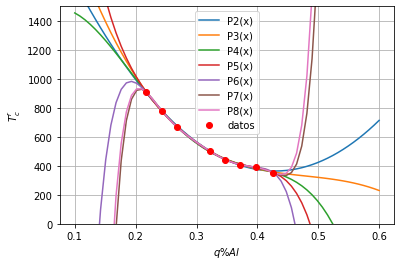

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Vector de colores
color=['red','green','blue','black','olive','yellow','lime','navy']

#Los datos experimentales
D=np.array([[0.21715817694369968,6.1148036253776431], [0.242895442359249,5.244712990936557], [0.268632707774799, 4.47129909365559], [0.32171581769436997, 3.375629405840887],[0.3474530831099195, 2.972809667673718],[0.3715817694369973,2.7472306143001024],[0.39731903485254694,2.618328298086608],[0.42627345844504017,2.376636455186306]])

#reescalando los datos de temperatura deacuerdo a codigo de esteban
D[:,1]=148.8*D[:,1]

#Las muestras
x, y = D[:,0], D[:,1]


#Poner mas valores en el dominio para graficar el polinomio
x_regresion = np.linspace( 0.1 , 0.6 , 60)


for n in range(2,9):
    #Regresion polinomica con polinomio de cierto grado#
    poly_regresion = np.polyfit(x, y, deg=n)
    ####################################################

    #Graficando el polinomio interpolado#
    plt.plot( x_regresion,  np.polyval(poly_regresion,  x_regresion ) ,label="P"+str(n)+"(x)" )
    ####################################

plt.plot( x, y, 'ro' ,label='datos')
plt.legend()
plt.xlabel('$q\%Al$')
plt.ylabel('$T^{r}_{c}$');
plt.ylim(0,1500)
plt.grid()
plt.show()



### Generando polinio interpolante con splines cubicos

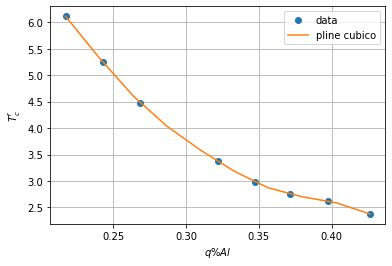

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d


#Los datos experimentales
D=np.array([[0.21715817694369968,6.1148036253776431], [0.242895442359249,5.244712990936557], [0.268632707774799, 4.47129909365559], [0.32171581769436997, 3.375629405840887],[0.3474530831099195, 2.972809667673718],[0.3715817694369973,2.7472306143001024],[0.39731903485254694,2.618328298086608],[0.42627345844504017,2.376636455186306]])


#reescalando los datos de temperatura deacuerdo a codigo de esteban
#D[:,1]=148.8*D[:,1]


#Las muestras
x, y = D[:,0], D[:,1]


#Interpolando con splines cubicos
F_Interpolacion = interp1d(x, y,kind='cubic')

x_interpolacion = np.linspace( D[0,0] , D[-1,0] , 10)


plt.plot(x,y, 'o' , x_interpolacion, F_Interpolacion(x_interpolacion), '-')
plt.legend(['data', 'pline cubico'], loc='best')


plt.xlabel('$q\%Al$')
plt.ylabel('$T^{r}_{c}$');

plt.grid()
plt.show()

<ipython-input-26-e9683153feda>:3: RuntimeWarning: divide by zero encountered in true_divide
  P = np.arctanh( 1/(7*(1-x)**2) )
<ipython-input-26-e9683153feda>:3: RuntimeWarning: invalid value encountered in arctanh
  P = np.arctanh( 1/(7*(1-x)**2) )


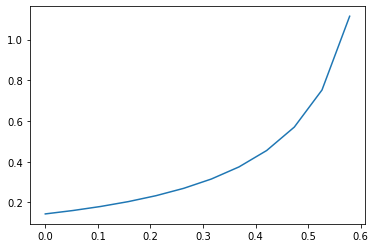

In [ ]:
x = np.linspace(0,1,20)

P = np.arctanh( 1/(7*(1-x)**2) )

plt.plot(x,P)

# *Metodo con interpolacion por red neuronal*

Buenos resultados con funciones de activacion relu y tres capas. Sin embargo se requieren mas datos para mejorar el modelo.

NOTA: Se optienen diferentes resultados con distintas funciones de activacion. selu y tanh son las mas apropiadas. Pero la combinacion mas apropiada es    tanh-tanh con solo dos capas, aunque selu-selu tambien es efectiva.

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np


#Los datos experimentales
D=np.array([[0.21715817694369968,6.1148036253776431], [0.242895442359249,5.244712990936557], [0.268632707774799, 4.47129909365559], [0.32171581769436997, 3.375629405840887],[0.3474530831099195, 2.972809667673718],[0.3715817694369973,2.7472306143001024],[0.39731903485254694,2.618328298086608],[0.42627345844504017,2.376636455186306]])


#Reescalando los datos de temperatura deacuerdo a codigo de esteban
#D[:,1]=148.8*D[:,1]


#Las muestras
x, y = D[:,0], D[:,1]


#x,y = x_interpolacion, F_Interpolacion(x_interpolacion)
#print(x, y)


modelo = keras.Sequential()
modelo.add(keras.layers.Dense(units = 1,  input_shape=[1]    ))
modelo.add(keras.layers.Dense(units = 64, activation = 'tanh'))
modelo.add(keras.layers.Dense(units = 64, activation = 'tanh'))
#modelo.add(keras.layers.Dense(units = 64, activation = 'selu'))
#modelo.add(keras.layers.Dense(units = 64, activation = 'selu'))
modelo.add(keras.layers.Dense(units = 1                      )) #dejar funcion de activacion ninguna, o linear


#Resumiendo el modelo
modelo.summary()


#Compilando el modelo
#modelo.compile(loss='mse', optimizer="adam")
modelo.compile( optimizer=tf.keras.optimizers.Adam(0.05), loss='mean_squared_error')



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 64)                128       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


In [ ]:

#Entrenando el modelo
print("Comenzando entrenamiento...esto puede llevar tiempo!")
historial = modelo.fit(x, y, epochs=200, verbose=False)
print("Modelo entrenado!")


Comenzando entrenamiento...esto puede llevar tiempo!
Modelo entrenado!


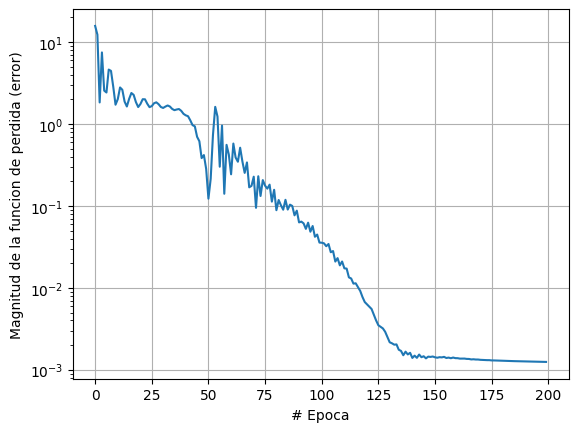

In [ ]:

#Grafico de la funcion de costo
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de la funcion de perdida (error)")
plt.plot(historial.history["loss"])
plt.grid()
plt.yscale('log')


7/7 [==============================] - 0s 3ms/step


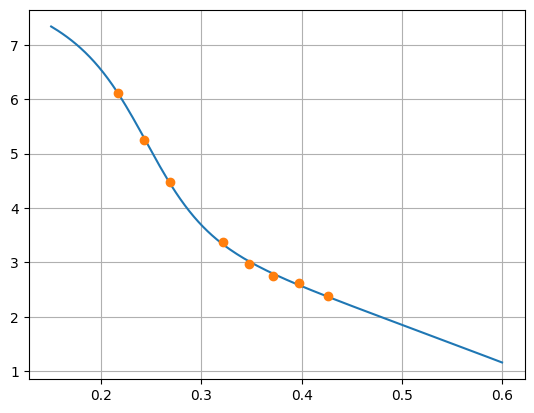

In [ ]:

#Graficando el modelo en ciertos puntos
x_regresion = np.linspace( 0.15 , 0.6 , 200)

#Usando el modelo para predecir puntos
y_regresion = modelo.predict(x_regresion)

#Haciendo el grafico
plt.plot(x_regresion,y_regresion)


#Graficando los datos
plt.plot(x,y,'o')


#Mostrando lo graficos
plt.grid()
plt.show()


**Conclusión:** Con este metodo NO se obtiene punto de percolación.


## Generando datos con polinomio interpolante de splines cubicos.

Nota: con este polinomio generaremos datos de forma artificial y luego los usaremos para entrenar la red neuronal.

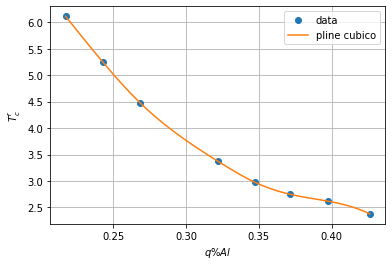

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


#Los datos experimentales
D=np.array([[0.21715817694369968,6.1148036253776431], [0.242895442359249,5.244712990936557], [0.268632707774799, 4.47129909365559], [0.32171581769436997, 3.375629405840887],[0.3474530831099195, 2.972809667673718],[0.3715817694369973,2.7472306143001024],[0.39731903485254694,2.618328298086608],[0.42627345844504017,2.376636455186306]])


#reescalando los datos de temperatura deacuerdo a codigo de esteban
#D[:,1]=148.8*D[:,1]


#Las muestras
x, y = D[:,0], D[:,1]


#Interpolando con splines cubicos
f_interpolacion = interp1d(x, y,kind='cubic')

x_interpolacion = np.linspace( D[0,0] , D[-1,0] , 80)


plt.plot(x,y, 'o' , x_interpolacion, f_interpolacion(x_interpolacion), '-')
plt.legend(['data', 'pline cubico'], loc='best')


plt.xlabel('$q\%Al$')
plt.ylabel('$T^{r}_{c}$');

plt.grid()
plt.show()

Entrenando red neuronal con los datos de la funcion de spline

In [ ]:

modelo = keras.Sequential()
modelo.add(keras.layers.Dense(units = 1,  input_shape=[1]    ))
modelo.add(keras.layers.Dense(units = 64, activation = 'selu'))
modelo.add(keras.layers.Dense(units = 64, activation = 'selu'))
#modelo.add(keras.layers.Dense(units = 64, activation = 'tanh'))
modelo.add(keras.layers.Dense(units = 1                      )) #dejar funcion de activacion ninguna, o linear


#Resumiendo el modelo
modelo.summary()


#Compilando el modelo
#modelo.compile(loss='mse', optimizer="adam")
modelo.compile( optimizer=tf.keras.optimizers.Adam(0.05), loss='mean_squared_error')


Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_204 (Dense)           (None, 1)                 2         
                                                                 
 dense_205 (Dense)           (None, 64)                128       
                                                                 
 dense_206 (Dense)           (None, 64)                4160      
                                                                 
 dense_207 (Dense)           (None, 1)                 65        
                                                                 
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


In [ ]:

#Datos del polinomio spline
y_interpolacion = f_interpolacion(x_interpolacion)


#Adicionando error a los datos para evitar oversampling?
y_interpolacion += 0.05*np.random.normal(size=len(x_interpolacion))


#Entrenando el modelo
historial = modelo.fit(x_interpolacion, y_interpolacion, epochs=200, verbose=False)
print("Modelo entrenado!")


Modelo entrenado!


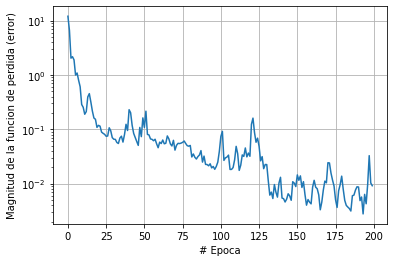

In [ ]:

#Grafico de la funcion de costo
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de la funcion de perdida (error)")
plt.plot(historial.history["loss"])
plt.grid()
plt.yscale('log')


7/7 [==============================] - 0s 2ms/step


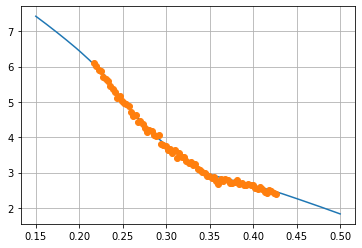

In [ ]:

#Graficando el modelo en ciertos puntos
x_regresion = np.linspace( 0.15 , 0.6 , 200)

#Usando el modelo para predecir puntos
y_regresion = modelo.predict(x_regresion)

#Haciendo el grafico
plt.plot(x_regresion,y_regresion)


#Graficando los datos
plt.plot(x_interpolacion, y_interpolacion,'o')


#Mostrando lo graficos
plt.grid()
plt.show()

### Red neuronal polinomica (ejemplo)

Data created successfully


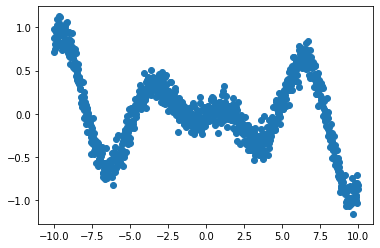

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import files
import tensorflow as tf
import math

# Create noisy data
x_data = np.linspace(-10, 10, num=1000)
y_data = 0.1*x_data*np.cos(x_data) + 0.1*np.random.normal(size=1000)
print('Data created successfully')


plt.plot(x_data,y_data,'o')

In [ ]:
# Create the model
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1,  activation = 'linear',  input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1,  activation = 'linear')) #dejar funcion de activacion ninguna, o linear
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 1)                 2         
                                                                 
 dense_62 (Dense)            (None, 64)                128       
                                                                 
 dense_63 (Dense)            (None, 64)                4160      
                                                                 
 dense_64 (Dense)            (None, 64)                4160      
                                                                 
 dense_65 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,515
Trainable params: 8,515
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training
model.fit( x_data, y_data, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3229
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1975
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1959
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1919
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1863
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1890
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1857
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1835
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1896
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1832
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1825
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1837
Epoch 13/100
32/32 [=================

32/32 [==============================] - 0s 1ms/step


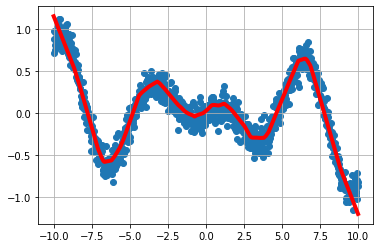

In [ ]:

# Compute the output
y_predicted = model.predict(x_data)

# Display the result
plt.scatter(x_data, y_data)
plt.plot(x_data, y_predicted, 'r', linewidth=4)
plt.grid()
plt.show()


Intentos de ajuste con redes neuronales en un sistemas con muchos datos

-------

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np


#Los datos experimentales
D=np.array([[0.0006717044500419989,1048.854961832061], [0.05037783375314861,1039.6946564885495], [0.061125104953820314,1039.6946564885498], [0.07455919395465996,1029.0076335877861], [0.08060453400503778, 1030.534351145038], [0.10008396305625533, 1019.8473282442748], [0.14979009235936191,1029.0076335877861], [0.15986565910999162,970.9923664122138], [0.1746431570109152,970.9923664122138], [0.2001679261125105,958.7786259541984], [0.19076406381192273, 922.1374045801522], [0.2001679261125106, 912.9770992366412], [0.22502099076406373, 902.2900763358778], [0.250545759865659, 851.9083969465652], [0.23979848866498754, 790.8396946564883], [0.25054575986565913,751.1450381679389], [0.27539882451721237,702.2900763358776], [0.27472712006717054, 651.9083969465651],[ 0.2995801847187238, 593.8931297709923], [0.31973131821998324, 551.1450381679387], [0.3244332493702772, 497.70992366412247], [0.33921074727120076, 502.29007633587776], [0.3499580184718724, 450.3816793893129], [0.37481108312342576, 400], [0.39899244332493705, 396.94656488549595], [0.3996641477749791, 351.14503816793876], [0.4238455079764903, 351.14503816793876], [0.44937027707808547, 262.59541984732823], [0.5246011754827877, 174.04580152671724]])



#x,y = x_interpolacion, F_Interpolacion(x_interpolacion)
#print(x, y)
x, y = D[:,0], D[:,1]

modelo = keras.Sequential()
modelo.add(keras.layers.Dense(units = 1,  input_shape=[1]    ))
modelo.add(keras.layers.Dense(units = 64, activation = 'tanh'))
modelo.add(keras.layers.Dense(units = 120, activation = 'tanh'))
#modelo.add(keras.layers.Dense(units = 120, activation = 'selu'))
#modelo.add(keras.layers.Dense(units = 100, activation = 'selu'))
#modelo.add(keras.layers.Dense(units = 120, activation = 'relu'))
#modelo.add(keras.layers.Dense(units = 120, activation = 'relu'))
modelo.add(keras.layers.Dense(units = 64, activation = 'linear'))
modelo.add(keras.layers.Dense(units = 120, activation = 'linear'))
modelo.add(keras.layers.Dense(units = 1                      )) #dejar funcion de activacion ninguna, o linear

#SIN LA CAPA LINEAL NO DAN BUENOS RESULTADOS

#Resumiendo el modelo
modelo.summary()


#Compilando el modelo
#modelo.compile(loss='mse', optimizer="adam")
modelo.compile( optimizer=tf.keras.optimizers.Adam(0.05), loss='mean_squared_error')



Model: "sequential_337"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2087 (Dense)          (None, 1)                 2         
                                                                 
 dense_2088 (Dense)          (None, 64)                128       
                                                                 
 dense_2089 (Dense)          (None, 120)               7800      
                                                                 
 dense_2090 (Dense)          (None, 64)                7744      
                                                                 
 dense_2091 (Dense)          (None, 120)               7800      
                                                                 
 dense_2092 (Dense)          (None, 1)                 121       
                                                                 
Total params: 23,595
Trainable params: 23,595
Non-tr

In [ ]:

#Entrenando el modelo
print("Comenzando entrenamiento...esto puede llevar tiempo!")
historial = modelo.fit(x, y, epochs=200, verbose=False)
print("Modelo entrenado!")


Comenzando entrenamiento...esto puede llevar tiempo!
Modelo entrenado!


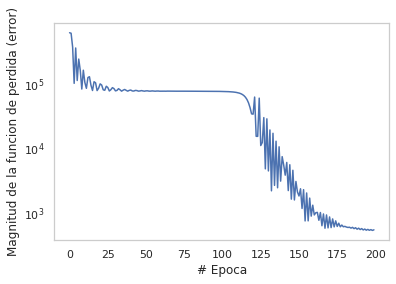

In [ ]:

#Grafico de la funcion de costo
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de la funcion de perdida (error)")
plt.plot(historial.history["loss"])
plt.grid()
plt.yscale('log')


32/32 [==============================] - 0s 2ms/step


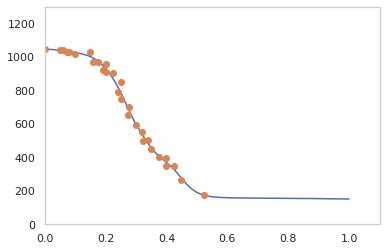

In [ ]:

#Graficando el modelo en ciertos puntos
x_regresion = np.linspace( 0 , 1 , 1000)

#Usando el modelo para predecir puntos
y_regresion = modelo.predict(x_regresion)

#Haciendo el grafico
plt.plot(x_regresion,y_regresion)

plt.ylim(0, 1300)
plt.xlim(0, 1.1)
#Graficando los datos
plt.plot(x,y,'o')

#Mostrando lo graficos
plt.grid()
plt.show()


**NOTAS:**

**1)** La red es mas eficiente (y se ve en el ajuste) si y solo si se usan capas lineales, no obstante no en cuentro combinación correcta para bajara el error a menos de 10^3 (voy a seguir jugando con esto si no puedo pos ajá f), aunque graficamente no se ve mal

**2)** La combinación:

modelo.add(keras.layers.Dense(units = 64, activation = 'tanh'))

modelo.add(keras.layers.Dense(units = 120, activation = 'tanh'))

modelo.add(keras.layers.Dense(units = 120, activation = 'linear'))

modelo.add(keras.layers.Dense(units = 120, activation = 'linear'))

Me parace particularmente buenna, se ve muy buen el  grafico, aunque de error esta horrible, y me gusta por que refleja el estancamiento a altas temperaturas y el punto de percolacion (cero) a bajas temperaturas

**3)** Hasta lo que llevo no importa cuanto cambien, **el error no baja**, esto se puede deber a que los datos **no siemprese se van a ajustar de manera perfecta, esto debido a error en los datos** del que hablamos una vez con el profe Leon (total voy a seguir experimentando por si ajá)

**4)** Esto era obvio pero por su misma naturaleza si dejo solo funciones  relu, selu y lienal, estas tienen problemas reproduciendo curvas suaves como la que se da en el orige de la grafica

**5)** Cuando se le agregan las funciones relu y selu tienden a tener subidaa en la gráfica luego del ajuste

**6)** Si se dejan 2 layers tanto linear como tanh ambas de 120, el ajsute no siempre toca el cero

### **Sistema $Fe_{x}Mn_{0.6-x}Al_{0.4}$ con redes neuronale iguales para las 3 transiciones**

-------------

Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_468 (Dense)           (None, 1)                 2         
                                                                 
 dense_469 (Dense)           (None, 120)               240       
                                                                 
 dense_470 (Dense)           (None, 120)               14520     
                                                                 
 dense_471 (Dense)           (None, 120)               14520     
                                                                 
 dense_472 (Dense)           (None, 120)               14520     
                                                                 
 dense_473 (Dense)           (None, 1)                 121       
                                                                 
Total params: 43,923
Trainable params: 43,923
Non-tra

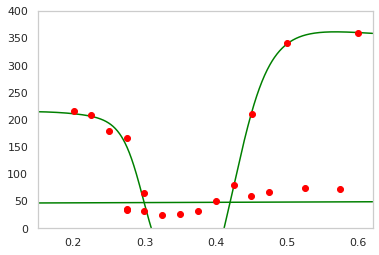

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np


#Los datos experimentales
#DFe=np.array([[0.4247546833184656,27.390180878552883],[0.4252007136485281,79.06976744186039],[0.450178412132025,199.99999999999994],[0.45017841213202503, 209.81912144702835],[0.5005798394290811,340.5684754521963],[0.6, 360]])
Dafe=np.array([[0.20040142729705618,215.50387596899236],[0.22537912578055308,208.78552971576227],[0.25035682426405,178.29457364341084],[0.27533452274754683,165.89147286821702],[0.29986619090098127,64.08268733850122],[0.2998661909009812,32.55813953488365]])
Dsg=np.array([[0.275, 36],[ 0.325,25],[0.350, 27],[0.375, 31],[0.400,50],[0.450,60],[0.475,67],[0.525,75],[0.575,73],[0.2751706484641638,34.24396442185514]])
DFe=np.array([[0.4252007136485281,79.06976744186039],[0.45017841213202503, 209.81912144702835],[0.5005798394290811,340.5684754521963],[0.6, 360]])

#x,y = x_interpolacion, F_Interpolacion(x_interpolacion)
#print(x, y)
xFe, yFe = DFe[:,0], DFe[:,1]
xafe, yafe = Dafe[:,0], Dafe[:,1]
xsg, ysg = Dsg[:,0], Dsg[:,1]


#==================TRANSICION FERROMAGNETICA==========================
modeloFe = keras.Sequential()
modeloFe.add(keras.layers.Dense(units = 1,  input_shape=[1]    ))
modeloFe.add(keras.layers.Dense(units = 120, activation = 'tanh'))
modeloFe.add(keras.layers.Dense(units = 120, activation = 'tanh'))
#modelo.add(keras.layers.Dense(units = 120, activation = 'selu'))
#modelo.add(keras.layers.Dense(units = 100, activation = 'selu'))
#modelo.add(keras.layers.Dense(units = 120, activation = 'relu'))
#modelo.add(keras.layers.Dense(units = 120, activation = 'relu'))
modeloFe.add(keras.layers.Dense(units = 120, activation = 'linear'))
modeloFe.add(keras.layers.Dense(units = 120, activation = 'linear'))

modeloFe.add(keras.layers.Dense(units = 1                      )) #dejar funcion de activacion ninguna, o linear

#Resumiendo el modelo
modeloFe.summary()

#Compilando el modelo
#modelo.compile(loss='mse', optimizer="adam")
modeloFe.compile( optimizer=tf.keras.optimizers.Adam(0.05), loss='mean_squared_error')

#Entrenando el modelo
print("Comenzando entrenamiento...esto puede llevar tiempo!")
historialFe = modeloFe.fit(xFe, yFe, epochs=300, verbose=False)
print("Modelo entrenado!")



#==================TRANSICION ANTIFERROMAGNETICA==========================
modeloafe = keras.Sequential()
modeloafe.add(keras.layers.Dense(units = 1,  input_shape=[1]    ))
modeloafe.add(keras.layers.Dense(units = 100, activation = 'tanh'))
modeloafe.add(keras.layers.Dense(units = 120, activation = 'tanh'))
#modelo.add(keras.layers.Dense(units = 120, activation = 'selu'))
#modelo.add(keras.layers.Dense(units = 100, activation = 'selu'))
#modelo.add(keras.layers.Dense(units = 120, activation = 'relu'))
#modelo.add(keras.layers.Dense(units = 120, activation = 'relu'))
modeloafe.add(keras.layers.Dense(units = 100, activation = 'linear'))
modeloafe.add(keras.layers.Dense(units = 120, activation = 'linear'))
modeloafe.add(keras.layers.Dense(units = 1                      )) #dejar funcion de activacion ninguna, o linear

#Resumiendo el modelo
modeloafe.summary()

#Compilando el modelo
#modelo.compile(loss='mse', optimizer="adam")
modeloafe.compile( optimizer=tf.keras.optimizers.Adam(0.05), loss='mean_squared_error')

#Entrenando el modelo
print("Comenzando entrenamiento...esto puede llevar tiempo!")
historialafe = modeloafe.fit(xafe, yafe, epochs=300, verbose=False)
print("Modelo entrenado!")



#==================TRANSICION SPIN GLASS==========================
modelosg = keras.Sequential()
modelosg.add(keras.layers.Dense(units = 1,  input_shape=[1]    ))
modelosg.add(keras.layers.Dense(units = 120, activation = 'tanh'))
modelosg.add(keras.layers.Dense(units = 120, activation = 'tanh'))
#modelo.add(keras.layers.Dense(units = 120, activation = 'selu'))
#modelo.add(keras.layers.Dense(units = 100, activation = 'selu'))
#modelo.add(keras.layers.Dense(units = 120, activation = 'relu'))
#modelo.add(keras.layers.Dense(units = 120, activation = 'relu'))
modelosg.add(keras.layers.Dense(units = 120, activation = 'linear'))
modelosg.add(keras.layers.Dense(units = 120, activation = 'linear'))
modelosg.add(keras.layers.Dense(units = 1                      )) #dejar funcion de activacion ninguna, o linear

#Resumiendo el modelo
modelosg.summary()

#Compilando el modelo
#modelo.compile(loss='mse', optimizer="adam")
modelosg.compile( optimizer=tf.keras.optimizers.Adam(0.05), loss='mean_squared_error')

#Entrenando el modelo
print("Comenzando entrenamiento...esto puede llevar tiempo!")
historialsg = modelosg.fit(xsg, ysg, epochs=300, verbose=False)
print("Modelo entrenado!")


#Graficando el modelo en ciertos puntos
x_regresion = np.linspace( 0 , 0.62 , 1000)

#Usando el modelo para predecir puntos
y_regresionFe = modeloFe.predict(x_regresion)
y_regresionafe = modeloafe.predict(x_regresion)
y_regresionsg = modelosg.predict(x_regresion)


#Haciendo el grafico
plt.plot(x_regresion,y_regresionFe,color='green')
plt.plot(x_regresion,y_regresionafe,color='green')
plt.plot(x_regresion,y_regresionsg,color='green')


plt.ylim(0, 400)
plt.xlim(0.15, 0.62)
#Graficando los datos
plt.plot(xFe,yFe,'o',color='red')
plt.plot(xafe,yafe,'o',color='red')
plt.plot(xsg,ysg,'o',color='red')



#Mostrando lo graficos
plt.grid()
plt.show()



### ERRORES DEL AJUSTE ANTERIOR

**-** *Transción Ferromagnetica*

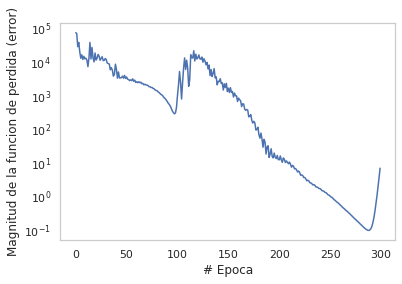

In [ ]:

#Grafico de la funcion de costo
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de la funcion de perdida (error)")
plt.plot(historialFe.history["loss"])
plt.grid()
plt.yscale('log')


**-** *Transción Antiferromagnetica*

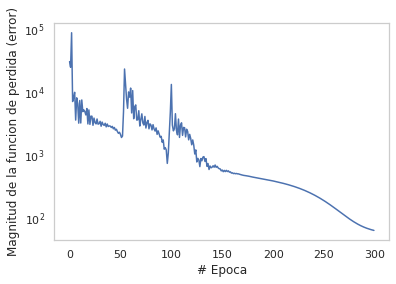

In [ ]:

#Grafico de la funcion de costo
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de la funcion de perdida (error)")
plt.plot(historialafe.history["loss"])
plt.grid()
plt.yscale('log')


**-** *Transción de Vidrio de espin*

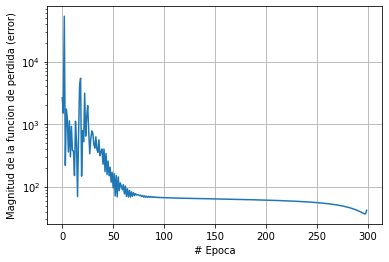

In [ ]:
#Grafico de la funcion de costo
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de la funcion de perdida (error)")
plt.plot(historialsg.history["loss"])
plt.grid()
plt.yscale('log')

**OBSERVACIONES**

**1)** El ajuste como siempre se ve bien en genearl (reordando que al ser algo aleatorio no siempre se va a ver bien pero en general si lo hacen), usé las mismas capas lineales y tangentes hiperbilicas que antes.

**2)** Pese a que el ajuste se **ve bien** el calculo del error es groseramente alto, adjudico este error a la impresisión en los datos, recordemos que los datos no importa sin son pocos o muchos tienen un cierto error relativo a la medida, por ende solo nos muestra el comportamiento o la tendencia

**3)** Tambien podriamos intentar mas combinaciones de capas a ver que pasa

### Bueno, ahora vamos por partes, sitemma $Fe_{x}Mn_{0.6-x}Al_{0.4}$ con  $0.4<x<0.65$

------------

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 64)                128       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12,675
Trainable params: 12,675
Non-trai

<ipython-input-6-2653ac1ed1e1>:84: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data= DataFrameResultados , x="data_x", y="data_y" , ci= 95 , color='green', linewidth=2.0 )


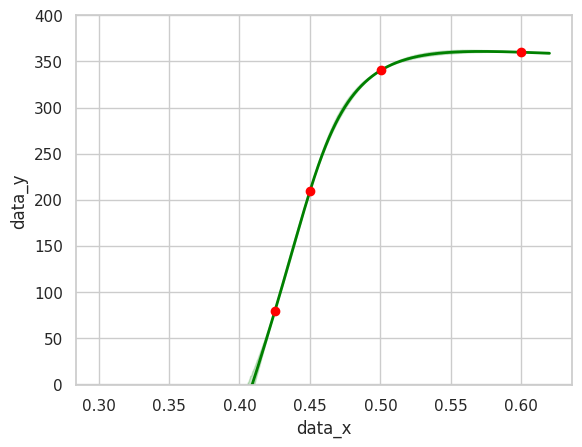

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import tensorflow as tf
from tensorflow import keras

#Modulos para la construccion de data frames
import pandas as pd

#Usaremos este graficador en vez de matplolib por estar enfocado a grandes datos
import seaborn as sns

ERRORES, RESULTADOS = [], []

#Los datos experimentales
DFe=np.array([[0.4252007136485281,79.06976744186039],[0.45017841213202503, 209.81912144702835],[0.5005798394290811,340.5684754521963],[0.6, 360]])
#DFe=np.array([[0.4247546833184656,27.390180878552883],[0.4252007136485281,79.06976744186039],[0.450178412132025,199.99999999999994],[0.5005798394290811,340.5684754521963],[0.6, 360]])

xFe, yFe = DFe[:,0], DFe[:,1]




for n in range(1,11):
  modeloFe = keras.Sequential()
  modeloFe.add(keras.layers.Dense(units = 1,  input_shape=[1]    ))
  modeloFe.add(keras.layers.Dense(units = 64, activation = 'tanh'))
  modeloFe.add(keras.layers.Dense(units = 64, activation = 'tanh'))
  #modeloFe.add(keras.layers.Dense(units = 64, activation = 'tanh'))
  #modelo.add(keras.layers.Dense(units = 120, activation = 'selu'))
  #modeloFe.add(keras.layers.Dense(units = 64, activation = 'exponential'))
  #modeloFe.add(keras.layers.Dense(units = 64, activation = 'sigmoid'))
  #modeloFe.add(keras.layers.Dense(units = 64, activation = 'hard_sigmoid'))
  #modeloFe.add(keras.layers.Dense(units = 120, activation = 'linear'))
  modeloFe.add(keras.layers.Dense(units= 64, activation = 'linear'))
  modeloFe.add(keras.layers.Dense(units = 64, activation = 'linear'))

  modeloFe.add(keras.layers.Dense(units = 1                      )) #dejar funcion de activacion ninguna, o linear

  #Resumiendo el modelo
  modeloFe.summary()

  #Compilando el modelo
  #modelo.compile(loss='mse', optimizer="adam")
  modeloFe.compile( optimizer=tf.keras.optimizers.Adam(0.005), loss='mean_squared_error')


  #Entrenando el modelo
  historialFe = modeloFe.fit(xFe, yFe, epochs=1300, verbose=False)


  #Graficando el modelo en ciertos puntos
  x_regresionFe = np.linspace( 0.3 , 0.62 , 1000)

  #Usando el modelo para predecir puntos
  y_regresionFe = modeloFe.predict(x_regresionFe)

  z=n*np.ones(len(x_regresionFe))
  #Hcemos una matrix 3x10 dond las 3 columnas son de datos en "x" el ajsute en "y" y "z" es el número del contador (set de datos)
  arreglo_data=np.column_stack( [ x_regresionFe, y_regresionFe, z ])
  #Nos lo combierte en lista con titulos
  lista_data= pd.DataFrame( arreglo_data, columns=['data_x', 'data_y', 'ordenamiento'] )
  #hacemos tensor con las listas
  RESULTADOS.append(lista_data)

  #--------------------------CALCULANDO LA FUNCION DE COSTOS----------------------
  Error = historialFe.history["loss"]

  print( min(Error) )


  arreglo_error = np.column_stack( [ np.array(Error), np.array( range(len(Error)) )  ,  n* np.ones_like(Error) ] )
  #creando el dataframe para registrar errores
  lista_error = pd.DataFrame( arreglo_error, columns=['error', 'epocas', 'ordenamiento'] )
  ERRORES.append(lista_error)

#Haciendo el grafico
#escojiendo fondo blanco
sns.set(style="whitegrid")

#nos pone las matrices del tensor en una misma matriz grande orednada
DataFrameResultados = pd.concat(RESULTADOS, ignore_index = True)
#Graficando TODOS los datos
sns.lineplot(data= DataFrameResultados , x="data_x", y="data_y" , ci= 95 , color='green', linewidth=2.0 )
plt.ylim((-1,400))
plt.plot(xFe,yFe,'o',color='red')
plt.show()



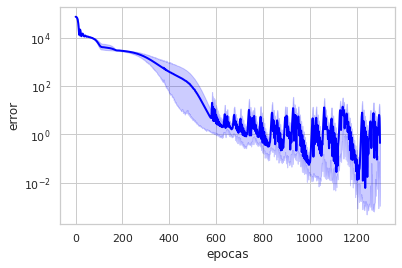

In [ ]:
DataFrameErrores = pd.concat(ERRORES, ignore_index = True)
sns.lineplot(data= DataFrameErrores , x="epocas", y="error" , ci= 95 , color='blue', linewidth=2.0 )

plt.yscale('log')
sns.color_palette("Spectral", as_cmap=True)

**NOTAS**

**1)** si solo repites dejas dentro del ciclo el ajuste tiende a dañar el ajuste luego de los 7 ciclos (en el mejor de los casos), entre mi ignorancia ante el recien aprendido metodo, este problema lo antribuyo a que al iniciar cada ciclo este ajusta tomando como inicio los datos los parametros del ciclo anterior, esto lo corregí definiendo el modelo desde cero en cada paso del ciclo, probablemente este problema  no era evidente en la versión del profe debido a que la gran cantidad de daatos generados no dejaba que el ajuste se desviara mucho, pero en este caso solo tenemos 8 datos.

Voy a seguir investigando a ver si tengo o no tengo razón con esto

**2)** hay 2 pares de datos que comparten x, por la misma naturaleza de una función los fit luchan mucho con el ajuste de estos datos, eston puntos son:

[0.4247546833184656,27.390180878552883] con [0.4252007136485281,79.06976744186039],

y

[0.450178412132025,199.99999999999994] con [0.45017841213202503, 209.81912144702835]

Si quitamos esos pares el fit ajuste demasido y eso se ve en el error, no pbstante no logro bajarlo de $10^{-1}$ en el mejor de los casos, no obstante con esos pares que comparten x no baja de $10^{3}$ así que eso ya es algo y no sé porque esto si la imagen se ve muy bien el ajuste

### Bueno, ahora vamos por partes, sitemma $Fe_{x}Mn_{0.6-x}Al_{0.4}$ con  $0<x<0.33$ y $50 K<T<250 K$

------------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import tensorflow as tf
from tensorflow import keras

#Modulos para la construccion de data frames
import pandas as pd

#Usaremos este graficador en vez de matplolib por estar enfocado a grandes datos
import seaborn as sns

ERRORES, RESULTADOS = [], []

#Los datos experimentales
Dafe=np.array([[0.20040142729705618,215.50387596899236],[0.22537912578055308,208.78552971576227],[0.25035682426405,178.29457364341084],[0.27533452274754683,165.89147286821702],[0.29986619090098127,64.08268733850122]])


xafe, yafe = Dafe[:,0], Dafe[:,1]




for n in range(1,11):
  modeloafe = keras.Sequential()
  modeloafe.add(keras.layers.Dense(units = 1,  input_shape=[1]    ))
  modeloafe.add(keras.layers.Dense(units = 100, activation = 'tanh'))
  modeloafe.add(keras.layers.Dense(units = 120, activation = 'tanh'))
  #modelo.add(keras.layers.Dense(units = 120, activation = 'selu'))
  #modelo.add(keras.layers.Dense(units = 100, activation = 'selu'))
  #modelo.add(keras.layers.Dense(units = 120, activation = 'relu'))
  #modelo.add(keras.layers.Dense(units = 120, activation = 'relu'))
  modeloafe.add(keras.layers.Dense(units = 100, activation = 'linear'))
  modeloafe.add(keras.layers.Dense(units = 120, activation = 'linear'))
  modeloafe.add(keras.layers.Dense(units = 1                      )) #dejar funcion de activacion ninguna, o linear


  #Resumiendo el modelo
  modeloafe.summary()

  #Compilando el modelo
  #modelo.compile(loss='mse', optimizer="adam")
  modeloafe.compile( optimizer=tf.keras.optimizers.Adam(0.05), loss='mean_squared_error')

  #Entrenando el modelo
  historialafe = modeloafe.fit(xafe, yafe, epochs=1000, verbose=False)



  #Graficando el modelo en ciertos puntos
  x_regresionafe = np.linspace( 0 , 0.4 , 1000)

  #Usando el modelo para predecir puntos
  y_regresionafe = modeloafe.predict(x_regresionafe)

  z=n*np.ones(len(x_regresionafe))
  #Hcemos una matrix 3x10 dond las 3 columnas son de datos en "x" el ajsute en "y" y "z" es el número del contador (set de datos)
  arreglo_data=np.column_stack( [ x_regresionafe, y_regresionafe, z ])
  #Nos lo combierte en lista con titulos
  lista_data= pd.DataFrame( arreglo_data, columns=['data_x', 'data_y', 'ordenamiento'] )
  #hacemos tensor con las listas
  RESULTADOS.append(lista_data)

  #--------------------------CALCULANDO LA FUNCION DE COSTOS----------------------
  Error = historialafe.history["loss"]
  print( min(Error) )
  arreglo_error = np.column_stack( [ np.array(Error), np.array( range(len(Error)) )  ,  n* np.ones_like(Error) ] )
  #creando el dataframe para registrar errores
  lista_error = pd.DataFrame( arreglo_error, columns=['error', 'epocas', 'ordenamiento'] )
  ERRORES.append(lista_error)

#Haciendo el grafico
#escojiendo fondo blanco
sns.set(style="whitegrid")

#nos pone las matrices del tensor en una misma matriz grande orednada
DataFrameResultados = pd.concat(RESULTADOS, ignore_index = True)
#Graficando TODOS los datos
sns.lineplot(data= DataFrameResultados , x="data_x", y="data_y" , ci= 95 , color='green', linewidth=2.0 )
plt.ylim((-1,400))
plt.plot(xafe,yafe,'o',color='red')
plt.show()



Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 1)                 2         
                                                                 
 dense_141 (Dense)           (None, 100)               200       
                                                                 
 dense_142 (Dense)           (None, 120)               12120     
                                                                 
 dense_143 (Dense)           (None, 100)               12100     
                                                                 
 dense_144 (Dense)           (None, 120)               12120     
                                                                 
 dense_145 (Dense)           (None, 1)                 121       
                                                                 
Total params: 36,663
Trainable params: 36,663
Non-tra

KeyboardInterrupt: ignored

In [ ]:
DataFrameErrores = pd.concat(ERRORES, ignore_index = True)
sns.lineplot(data= DataFrameErrores , x="epocas", y="error" , ci= 95 , color='blue', linewidth=2.0 )

plt.yscale('log')
sns.color_palette("Spectral", as_cmap=True)

### Bueno, ahora vamos por partes, sitemma $Fe_{x}Mn_{0.6-x}Al_{0.4}$ con  $0<x<0.6$ y $T<50 K $

------------

 **NOTA:** poner en la transición de vidrio de espín los datos que borré en las demas transiciones

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np


#Modulos para la construccion de data frames
import pandas as pd

#Usaremos este graficador en vez de matplolib por estar enfocado a grandes datos
import seaborn as sns

ERRORES, RESULTADOS = [], []

#Los datos experimentales
Dsg=np.array([[0.275, 36],[ 0.325,25],[0.350, 27],[0.375, 31],[0.400,50],[0.450,60],[0.475,67],[0.525,75],[0.575,73],[0.2751706484641638,34.24396442185514],[0.2998661909009812,32.55813953488365]])
#[0.4247546833184656,27.390180878552883]
#x,y = x_interpolacion, F_Interpolacion(x_interpolacion)
xsg, ysg = Dsg[:,0], Dsg[:,1]

for n in range(1,5):
  modelosg = keras.Sequential()
  modelosg.add(keras.layers.Dense(units = 1,  input_shape=[1]    ))
  #modelosg.add(keras.layers.Dense(units = 64, activation = 'tanh'))
  modelosg.add(keras.layers.Dense(units = 5, activation = 'sigmoid'))
  modelosg.add(keras.layers.Dense(units = 5, activation = 'gelu'))
  #modelosg.add(keras.layers.Dense(units = 10, activation = 'selu'))
  #modelosg.add(keras.layers.Dense(units = 10, activation = 'relu'))
  #modelosg.add(keras.layers.Dense(units = 120, activation = 'Softplu'))
  #modelosg.add(keras.layers.Dense(units = 64, activation = 'linear'))
  #modelosg.add(keras.layers.Dense(units = 64, activation = 'linear'))
  modelosg.add(keras.layers.Dense(units = 1                      )) #dejar funcion de activacion ninguna, o linear

  #Resumiendo el modelo
  modelosg.summary()

  #Compilando el modelo
  #modelo.compile(loss='mse', optimizer="adam")
  modelosg.compile( optimizer=tf.keras.optimizers.Adam(0.005), loss='mean_squared_error')

  #Entrenando el modelo
  print("Comenzando entrenamiento...esto puede llevar tiempo!")
  historialsg = modelosg.fit(xsg, ysg, epochs=10000, verbose=False)
  print("Modelo entrenado!")

  x_regresionsg = np.linspace( 0 ,0.6 , 1000)

  #Usando el modelo para predecir puntos
  y_regresionsg = modelosg.predict(x_regresionsg)

  z=n*np.ones(len(x_regresionsg))
  #Hcemos una matrix 3x10 dond las 3 columnas son de datos en "x" el ajsute en "y" y "z" es el número del contador (set de datos)
  arreglo_data=np.column_stack( [ x_regresionsg, y_regresionsg, z ])
  #Nos lo combierte en lista con titulos
  lista_data= pd.DataFrame( arreglo_data, columns=['data_x', 'data_y', 'ordenamiento'] )
  #hacemos tensor con las listas
  RESULTADOS.append(lista_data)

  #--------------------------CALCULANDO LA FUNCION DE COSTOS----------------------
  Error = historialsg.history["loss"]
  print( min(Error) )
  arreglo_error = np.column_stack( [ np.array(Error), np.array( range(len(Error)) )  ,  n* np.ones_like(Error) ] )
  #creando el dataframe para registrar errores
  lista_error = pd.DataFrame( arreglo_error, columns=['error', 'epocas', 'ordenamiento'] )
  ERRORES.append(lista_error)

#Haciendo el grafico
#escojiendo fondo blanco
sns.set(style="whitegrid")

#nos pone las matrices del tensor en una misma matriz grande orednada
DataFrameResultados = pd.concat(RESULTADOS, ignore_index = True)
#Graficando TODOS los datos
sns.lineplot(data= DataFrameResultados , x="data_x", y="data_y" , ci= 95 , color='green', linewidth=2.0 )
plt.ylim((-1,400))
plt.plot(xsg,ysg,'o',color='red')
plt.show()








Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
 dense_9 (Dense)             (None, 5)                 10        
                                                                 
 dense_10 (Dense)            (None, 5)                 30        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________
Comenzando entrenamiento...esto puede llevar tiempo!


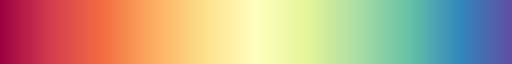

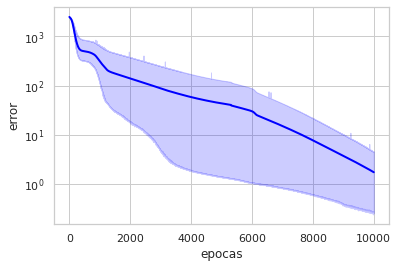

In [ ]:
DataFrameErrores = pd.concat(ERRORES, ignore_index = True)
sns.lineplot(data= DataFrameErrores , x="epocas", y="error" , ci= 95 , color='blue', linewidth=2.0 )

plt.yscale('log')
sns.color_palette("Spectral", as_cmap=True)

**NOTA:** si dejo todos los datos se ve horrible si elimino 2 datos se ve mucho mejor, necesitamos un criterio claro para saber cuando eliminar y cuando no, esto se debe hablar con el profe german

#Prueba del modelo dentro de la ecuación de renormalización para el sistema $Fe_{1-x}A_{x}$


------------------------------

COMO SOLO SE TIENE UN TIPO DE INTERACCIÓN PODEMOS DESPEJAR LA ECUACIÓN DE RENORMALIZCIÓN TAL QUE

$\frac{z}{z-1}=1+x^{2}*\tanh\Big(\frac{J(x)}{T}\Big)$

$\Big(\frac{\frac{z}{z-1}-1}{x^{2}}\Big)=\tanh\Big(\frac{J(x)}{T}\Big)$

$\tanh^{-1} \Big(\frac{1}{(z-1)x^{2}}\Big)=\frac{J(x)}{T}$

$T\tanh^{-1} \Big(\frac{1}{(z-1)x^{2}}\Big)=J(x)$

$T'=J(x)$

Ahora, tomando los datos experimentales y rescalandolos a $T'=T\tanh^{-1} \Big(\frac{1}{(z-1)x^{2}}\Big)$ podemos ajustar $T'$ vs $x$ para obtener usando machine learning directamete la energía de enlace $J(x)$.

**Nota:** Esto solo sirve solo para sistemas diluidos, en el que $Fe-Al$ es una buena muestra de estos

[0.78284182 0.75710456 0.73136729 0.67828418 0.65254692 0.62841823
 0.60268097 0.57372654] [1.45209284 1.33522777 1.22383903 1.08395543 1.0375131  1.04090912
 1.08844227 1.10470189]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 120)               240       
                                                                 
 dense_2 (Dense)             (None, 120)               14520     
                                                                 
 dense_3 (Dense)             (None, 64)                7744      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense

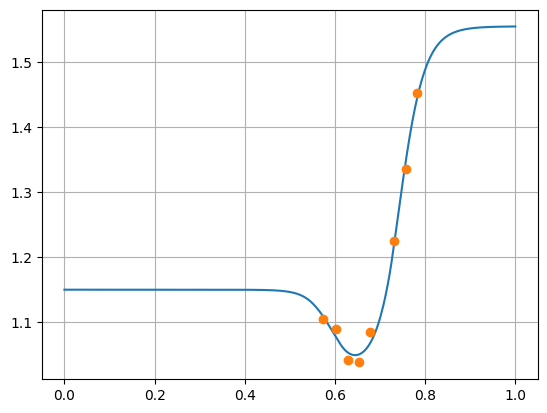

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np


#Los datos experimentales
D=np.array([[0.21715817694369968,6.1148036253776431], [0.242895442359249,5.244712990936557], [0.268632707774799, 4.47129909365559], [0.32171581769436997, 3.375629405840887],[0.3474530831099195, 2.972809667673718],[0.3715817694369973,2.7472306143001024],[0.39731903485254694,2.618328298086608],[0.42627345844504017,2.376636455186306]])


#Reescalando los datos de temperatura deacuerdo a codigo de esteban
D[:,0]=( 1 - D[:,0] )


#modifico los datos para ajustar J(x)
D[:,1]= np.arctanh(1/(7* D[:,0]**2  ))*D[:,1]
D[:,0]= D[:,0]


#Las muestras
#x, y = D[:,0], 148.8 * D[:,1]
x, y = D[:,0], D[:,1]

#datos sin normalizar
print( x,y)






#x,y = x_interpolacion, F_Interpolacion(x_interpolacion)
#print(x, y)


#Malla Esteban
modelo = keras.Sequential()
modelo.add(keras.layers.Dense(units = 1,  input_shape=[1]    ))
modelo.add(keras.layers.Dense(units = 120, activation = 'tanh'))
modelo.add(keras.layers.Dense(units = 120, activation = 'tanh'))
#modelo.add(keras.layers.Dense(units = 120, activation = 'linear'))
modelo.add(keras.layers.Dense(units = 64, activation = 'softmax'))
modelo.add(keras.layers.Dense(units = 64, activation = 'selu'))
modelo.add(keras.layers.Dense(units = 50, activation = 'sigmoid'))
modelo.add(keras.layers.Dense(units = 50, activation = 'gelu'))
modelo.add(keras.layers.Dense(units = 50, activation = 'selu'))
modelo.add(keras.layers.Dense(units = 15, activation = 'relu'))
#modelo.add(keras.layers.Dense(units = 120, activation = 'Softplu'))
modelo.add(keras.layers.Dense(units = 1                      )) #dejar funcion de activacion ninguna, o linear




modelo.add(keras.layers.Dense(units = 1                      )) #dejar funcion de activacion ninguna, o linear





#Resumiendo el modelo
modelo.summary()


#Compilando el modelo
#modelo.compile(loss='mse', optimizer="adam")
modelo.compile( optimizer=tf.keras.optimizers.Adam(0.01), loss='mean_squared_error')


#Entrenando el modelo
print("Comenzando entrenamiento...esto puede llevar tiempo!")
historial = modelo.fit(x, y, epochs=200, verbose=False)
print("Modelo entrenado!")



#Graficando el modelo en ciertos puntos
#x_regresion = np.linspace( 0.4 ,1 , 600)

x_regresion =  np.linspace( 0 ,1 , 500)

#Usando el modelo para predecir puntos
y_regresion = modelo.predict(x_regresion)

#Haciendo el grafico
plt.plot(x_regresion,y_regresion)


#Graficando los datos
plt.plot(x,y,'o')
#plt.ylim([0, 2])

#Mostrando lo graficos
plt.grid()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np


#Los datos experimentales
D=np.array([[0.21715817694369968,6.1148036253776431], [0.242895442359249,5.244712990936557],
            [0.268632707774799, 4.47129909365559], [0.32171581769436997, 3.375629405840887],
            [0.3474530831099195, 2.972809667673718],[0.3715817694369973,2.7472306143001024],
            [0.39731903485254694,2.618328298086608],[0.42627345844504017,2.376636455186306]])


#Reescalando los datos de temperatura deacuerdo a codigo de esteban
x =( 1 - D[:,0] )

#modifico los datos para ajustar J(x)
y = 10 * np.arctanh( 1 / ( 7 * x**2  ) ) * D[:,1]


#x,y = x_interpolacion, F_Interpolacion(x_interpolacion)
#print(x, y)


modelo = keras.Sequential()
modelo.add(keras.layers.Dense(units = 1,  input_shape=[1]    ))
modelo.add(keras.layers.Dense(units = 16, activation = 'tanh'))
modelo.add(keras.layers.Dense(units = 16, activation = 'tanh'))
#modelo.add(keras.layers.Dense(units = 120, activation = 'linear'))
#modelo.add(keras.layers.Dense(units = 64, activation = 'softmax'))
#modelo.add(keras.layers.Dense(units = 64, activation = 'selu'))

#modelo.add(keras.layers.Dense(units = 32, activation = 'sigmoid'))
#modelo.add(keras.layers.Dense(units = 32, activation = 'sigmoid'))


#modelo.add(keras.layers.Dense(units = 5, activation = 'gelu'))
#modelo.add(keras.layers.Dense(units = 10, activation = 'selu'))
#modelo.add(keras.layers.Dense(units = 10, activation = 'relu'))
#modelo.add(keras.layers.Dense(units = 120, activation = 'Softplu'))
modelo.add(keras.layers.Dense(units = 1                      )) #dejar funcion de activacion ninguna, o linear


#Resumiendo el modelo
modelo.summary()


#Compilando el modelo
modelo.compile(loss='mse', optimizer="adam")
#modelo.compile( optimizer=tf.keras.optimizers.SGD(0.1), loss='mean_squared_error')


#Entrenando el modelo
print("Comenzando entrenamiento...esto puede llevar tiempo!")
historial = modelo.fit(x, y, epochs=2000, verbose=True)
print("Modelo entrenado!")



1/1 [==============================] - 0s 95ms/step


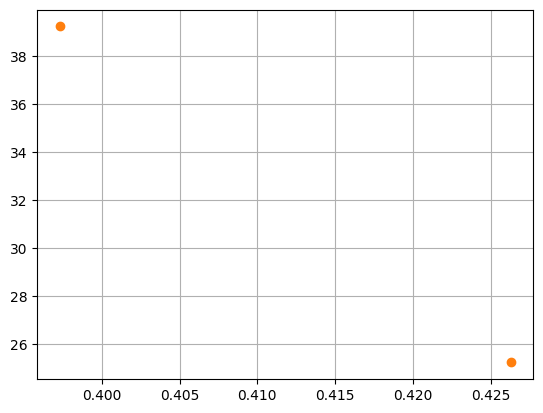

In [ ]:


#Graficando el modelo en ciertos puntos
#x_regresion = np.linspace( 0.4 ,1 , 600)

#x_regresion = np.linspace( 0 ,1 , 1000)

#Usando el modelo para predecir puntos
y_regresion = modelo.predict(x)

#Haciendo el grafico

plt.plot(x,y_regresion)

#plt.plot(x_regresion,y_regresion)


#Graficando los datos
plt.plot(x,y,'o')
#plt.ylim([0, 2])

#Mostrando lo graficos
plt.grid()
plt.show()


In [ ]:
#plot el ajsuste metido en la ecuaión de grupos de renormalización


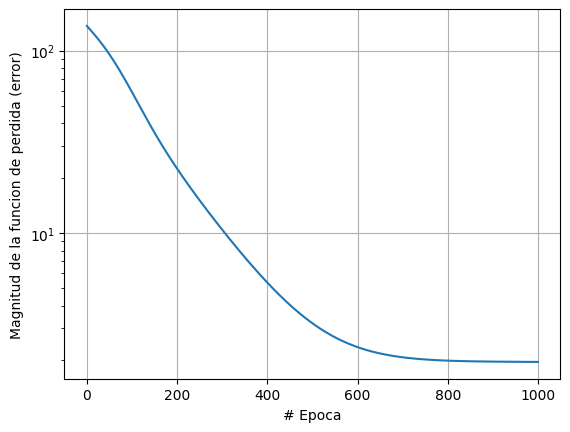

In [ ]:

#Grafico de la funcion de costo
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de la funcion de perdida (error)")
plt.plot(historial.history["loss"])
plt.grid()
plt.yscale('log')


#Adicionando puntos con una funcion spline!

**NOTA:** Escalar los datos de entrenamiento de una red neuronal de forma diferente afecta el rendimiento o la convergencia de la regresión, puede haber varias razones:

- Sensibilidad de la red a la escala de los datos: Algunos algoritmos de optimización utilizados en el entrenamiento de redes neuronales, como el descenso de gradiente, pueden ser sensibles a la escala de los datos. Si los datos no están correctamente escalados, puede afectar la convergencia del modelo y dificultar la optimización de los parámetros.

- Funciones de activación y gradientes: Las funciones de activación, como la función sigmoide o la tangente hiperbólica, tienen rangos de salida limitados. Si los datos no están escalados dentro de estos rangos adecuados, las funciones de activación pueden saturarse, lo que puede resultar en gradientes cercanos a cero y dificultar el aprendizaje del modelo.

- Interacción entre características: Si las características tienen diferentes escalas y no se escalan correctamente, la red neuronal puede tener dificultades para aprender las interacciones entre ellas. Esto puede llevar a un rendimiento deficiente en la regresión, ya que no se capturan las relaciones complejas entre las características.

Para abordar estos problemas, es importante escalar los datos de manera adecuada antes de alimentarlos a la red neuronal. Es común utilizar técnicas como la normalización o la estandarización para asegurarse de que todas las características estén en rangos comparables y tengan una escala adecuada para el modelo. Esto ayuda a mejorar la convergencia y el rendimiento del modelo.

datos sin reescalar
[1.45209284 1.33522777 1.22383903 1.08395543 1.0375131  1.04090912
 1.08844227 1.10470189]

datos reescalados
[1.         0.71811197 0.44943328 0.11202269 0.         0.00819148
 0.12284531 0.16206482]

Comenzando entrenamiento...esto puede llevar tiempo!
Modelo entrenado!
16/16 [==============================] - 0s 2ms/step


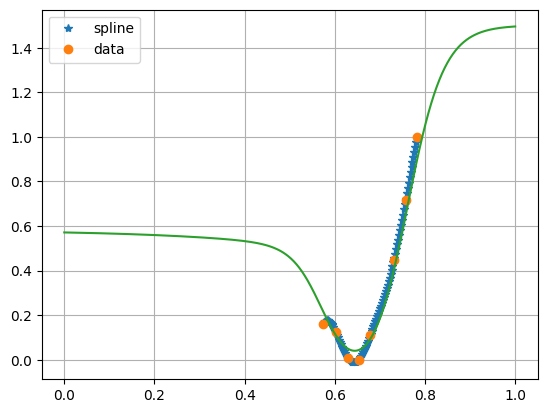

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np



from scipy.interpolate import interp1d



#Los datos experimentales
D=np.array([[0.21715817694369968,6.1148036253776431], [0.242895442359249,5.244712990936557], [0.268632707774799, 4.47129909365559], [0.32171581769436997, 3.375629405840887],[0.3474530831099195, 2.972809667673718],[0.3715817694369973,2.7472306143001024],[0.39731903485254694,2.618328298086608],[0.42627345844504017,2.376636455186306]])


#Reescalando los datos de temperatura deacuerdo a codigo de esteban
D[:,0]=( 1 - D[:,0] )




#modifico los datos para ajustar J(x)
D[:,1]= np.arctanh(1/(7* D[:,0]**2  ))*D[:,1]
D[:,0]= D[:,0]


#Las muestras
x, y = D[:,0],  D[:,1]


print("datos sin reescalar")
print(y)
input()





#Normalizemos los datos con la normalizacion min/max
min_y = np.min(y)
max_y = np.max(y)

# Aplicar la normalización min-max en y
y = (y - min_y) / (max_y - min_y)

#datos normalizados por min/max
print("datos reescalados")
print(y)
input()






#Interpolando con splines cubicos
f_interpolacion = interp1d(x, y,kind='cubic')

x_interpolacion = np.linspace( D[0,0] , D[-1,0] , 100)

#Datos del polinomio spline
y_interpolacion = f_interpolacion(x_interpolacion)


#graficando datos originales e interpolados
plt.plot(x_interpolacion, y_interpolacion, '*' )
plt.plot( x,y, 'o' )
plt.legend(['spline', 'data'], loc='best')
plt.grid()




#======================NUEVA MALLA====================
"""
Esta malla sirve unicamente en el orden preestablecido. Es decir, si la funcion
softmax cambia de posicion, ya no se realiza bien el ajuste. Debemos tratar de entender esto!
"""

modelo = keras.Sequential()

modelo.add(keras.layers.Dense(units = 1,  input_shape=[1]    ))

modelo.add(keras.layers.Dense(units = 128, activation = 'tanh'))

modelo.add(keras.layers.Dense(units = 128, activation = 'softmax'))

modelo.add(keras.layers.Dense(units = 128, activation = 'sigmoid'))

modelo.add(keras.layers.Dense(units = 1 ,                         )) #dejar funcion de activacion ninguna, o linear



#Compilando el modelo
#modelo.compile(loss='mse', optimizer="adam")
modelo.compile( optimizer=tf.keras.optimizers.Adam(0.01), loss='mean_squared_error')


#Entrenando el modelo
print("Comenzando entrenamiento...esto puede llevar tiempo!")
historial = modelo.fit(x_interpolacion , y_interpolacion , epochs=200, verbose=False)
print("Modelo entrenado!")



#Graficando el modelo en ciertos puntos

x_regresion =  np.linspace( 0 ,1 , 500)

#Usando el modelo para predecir puntos
y_regresion = modelo.predict( x_regresion )


#Haciendo el grafico obtenido de la NN
plt.plot(  x_regresion , y_regresion)


#Mostrando lo graficos
plt.show()


evaluando la fucion en 1 punto

In [ ]:
#Usando el modelo para predecir puntos
yy = modelo.predict( [ 0.6 ]  )


print(  yy , yy.shape )

print(  yy[ 0,0 ] )


1/1 [==============================] - 0s 38ms/step
[[0.11676294]] (1, 1)
0.116762936


Vamos a ajustar J teniendo una cantidad grande de datos limpiados por el profesor




In [ ]:
#Importando modulos
import numpy as np

from scipy.interpolate import interp1d, lagrange
import tensorflow as tf
from tensorflow import keras

#Modulos para la construccion de data frames
import pandas as pd

#Usaremos este graficador en vez de matplolib por estar enfocado a grandes datos
import seaborn as sns

import matplotlib.pyplot as plt

#NUMERO DE VECES QUE HAREMOS EL EXPERIMENTO NUMERICO
#------
N_experimentos =20
#------


#Numero de epocas en los que se entrenara  cada modelo
EPOCAS = 140
#---------


#Numero de datos generados con interponacion spline
generar_datos = 'no' #NOTA: aqui, a diferencia del caso de pocos datos, si se generan mas se daña el resultado

Datos_generados= 100

#--------------------INTERPOLANDO CON SPLINES CUBICOS------------


####################CASO CON MUCHOS DATOS##########################
#Los datos experimentales (EStos dattos toco ordenarlos....especificamente el del 0.25, el cual no estaba ordenado y habiando dos repetidos!)
D=np.array([[0.0006717044500419989,1048.854961832061],
            [0.05037783375314861,1039.6946564885495],
            [0.061125104953820314,1039.6946564885498],
            [0.07455919395465996,1029.0076335877861],
            [0.08060453400503778, 1030.534351145038],
            [0.10008396305625533, 1019.8473282442748],
            [0.14979009235936191,1029.0076335877861],
            [0.15986565910999162,970.9923664122138],
            [0.1746431570109152,970.9923664122138],
            [0.2001679261125105,958.7786259541984],
            [0.19076406381192273, 922.1374045801522],
            [0.2001679261125106, 912.9770992366412],
            [0.22502099076406373, 902.2900763358778],
            [0.23979848866498754, 790.8396946564883],
            [0.250545759865659, 851.9083969465652],
            [0.25054575986565913,751.1450381679389],
            [0.27539882451721237,702.2900763358776],
            [0.27472712006717054, 651.9083969465651],
            [0.2995801847187238, 593.8931297709923],
            [0.31973131821998324, 551.1450381679387],
            [0.3244332493702772, 497.70992366412247],
            [0.33921074727120076, 502.29007633587776],
            [0.3499580184718724, 450.3816793893129],
            [0.37481108312342576, 400],
            [0.39899244332493705, 396.94656488549595],
            [0.3996641477749791, 351.14503816793876],
            [0.4238455079764903, 351.14503816793876],
            [0.44937027707808547, 262.59541984732823],
            [0.5246011754827877, 174.04580152671724]])


New_D=[ D[0] ]
for i in range(1,len(D[:,0])):

  #Criterio de distancia entre datos con x
  if abs( D[i,0]-D[i-1,0] ) > 0.015:
       New_D.append( D[i] )
  #---------------------------------------

#Re-escribiendo los datos filtrados sobre los viejos
D = np.array(New_D)
T = np.array(New_D)


#Reescalando los datos de temperatura y corrimiento de los datos de concentración, recordemos que el ajuste falla para temperaturas altas y toca reescalar
T[:,0]=( 1 - T[:,0] )
T[:,1]=  T[:,1]/148.8


#Reescalando los datos de temperatura y corrimiento de los datos de concentración, recordemos que el ajuste falla para temperaturas altas y toca reescalar
D[:,0]=( 1 - D[:,0] )
D[:,1]=  D[:,1]/148.8

#modifico los datos para ajustar J(x)
D[:,1]= np.arctanh(1/(7* D[:,0]**2  ))*D[:,1]
D[:,0]= D[:,0]


#Las muestras
#x, y = D[:,0], 148.8 * D[:,1]
x, y = D[:,0], 1* D[:,1]

#Malla Esteban
modelo = keras.Sequential()
modelo.add(keras.layers.Dense(units = 1,  input_shape=[1]    ))
modelo.add(keras.layers.Dense(units = 100, activation = 'tanh'))
modelo.add(keras.layers.Dense(units = 100, activation = 'tanh'))
#modelo.add(keras.layers.Dense(units = 20, activation = 'linear'))
modelo.add(keras.layers.Dense(units = 100, activation = 'softmax'))
modelo.add(keras.layers.Dense(units = 100, activation = 'selu'))
#modelo.add(keras.layers.Dense(units = 100, activation = 'sigmoid'))
modelo.add(keras.layers.Dense(units = 100, activation = 'gelu'))
modelo.add(keras.layers.Dense(units = 100, activation = 'selu'))
#modelo.add(keras.layers.Dense(units = 100, activation = 'relu'))
#modelo.add(keras.layers.Dense(units = 120, activation = 'Softplu'))
modelo.add(keras.layers.Dense(units = 1                      )) #dejar funcion de activacion ninguna, o linear




modelo.add(keras.layers.Dense(units = 1                      )) #dejar funcion de activacion ninguna, o linear





#Resumiendo el modelo
modelo.summary()


#Compilando el modelo
#modelo.compile(loss='mse', optimizer="adam")
modelo.compile( optimizer=tf.keras.optimizers.Adam(0.01), loss='mean_squared_error')


#Entrenando el modelo
print("Comenzando entrenamiento...esto puede llevar tiempo!")
historial = modelo.fit(x, y, epochs=250, verbose=False)
print("Modelo entrenado!")



#Graficando el modelo en ciertos puntos
#x_regresion = np.linspace( 0.4 ,1 , 600)

x_regresion =  np.linspace( 0 ,1 , 500)

#Usando el modelo para predecir puntos
y_regresion = modelo.predict(x_regresion)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
 dense_12 (Dense)            (None, 100)               200       
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 100)              

4/4 [==============================] - 0s 4ms/step


<ipython-input-6-7ea3af3091ab>:24: RuntimeWarning: invalid value encountered in arctanh
  F = 1/np.arctanh( 1 / (7* x1**2)  )


(100,) (100,)
f
4/4 [==============================] - 0s 4ms/step


<ipython-input-6-7ea3af3091ab>:53: RuntimeWarning: invalid value encountered in arctanh
  F = 1/np.arctanh( 1 / (7* x1**2)  )


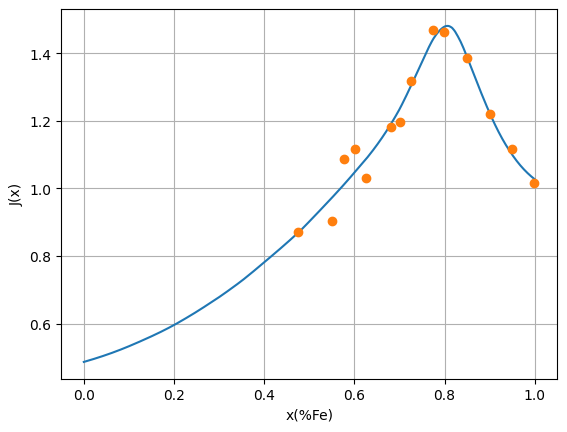

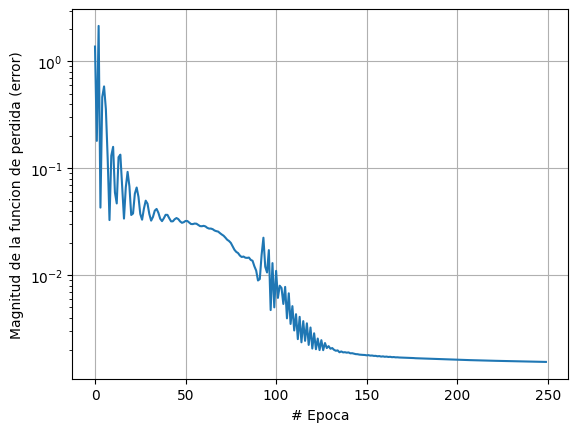

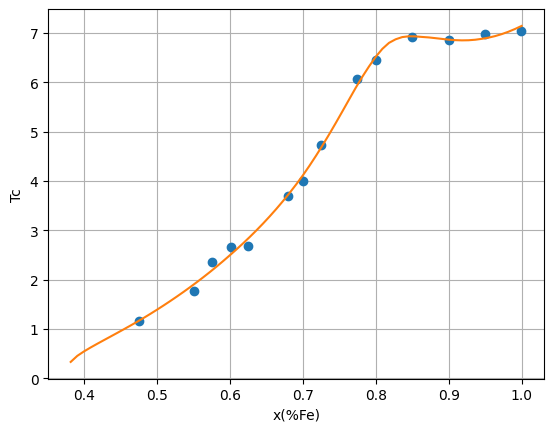

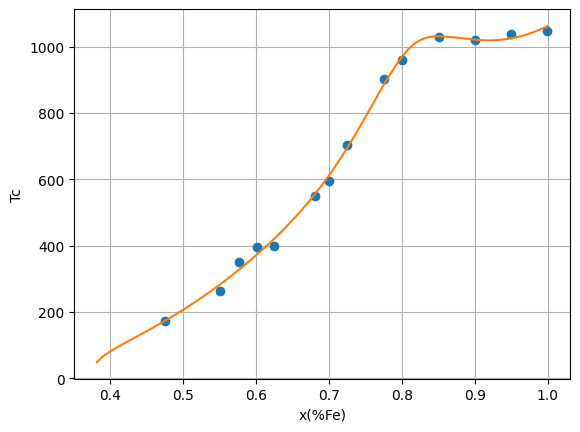

In [ ]:


#Haciendo el grafico
fig1, g1 = plt.subplots()
g1.plot(x_regresion,y_regresion)
g1.plot(x,y,'o')
plt.xlabel("x(%Fe)")
plt.ylabel("J(x)")
g1.grid()

#Grafico de la funcion de costo
fig2, g2 = plt.subplots()
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de la funcion de perdida (error)")
g2.plot(historial.history["loss"])
g2.grid()
plt.yscale('log')

#Grafico de la temperatura
def f(x):
  return  np.arctanh( 1 / (7* x**2)  )

x1 =  np.linspace( 0.1 ,1 , 100)
y1 =  modelo.predict(x1)

F = 1/np.arctanh( 1 / (7* x1**2)  )



print( y1[:,0].shape, F.shape )
input()


fig3, g3 = plt.subplots()
g3.plot(T[:,0],T[:,1],'o')



g3.plot( x1, y1[:,0] * F )


plt.xlabel("x(%Fe)")
plt.ylabel("Tc")
g3.grid()


#================================================

fig4, g4 = plt.subplots()
g4.plot(T[:,0],148.8*T[:,1],'o')

x1 =  np.linspace( 0.1 ,1 , 100)
y1 =  148.8*modelo.predict(x1)

F = 1/np.arctanh( 1 / (7* x1**2)  )

g4.plot( x1, y1[:,0] * F )


plt.xlabel("x(%Fe)")
plt.ylabel("Tc")
g4.grid()



In [ ]:
c=0.5

y1 =  148.8*modelo.predict([c])

print(y1)

1/1 [==============================] - 0s 60ms/step
[[134.24622]]
